# Chebyshev Distance

Chebyshev distance, also known as L-infinity distance or chessboard distance, measures the maximum absolute difference between any single coordinate of two points. Essentially, it tells you the largest "single-dimension" difference between two points.

Imagine a chess game: a King can move one square in any direction (horizontal, vertical, or diagonal). The Chebyshev distance between two squares on a chessboard is the minimum number of moves a King would need to get from one square to the other.

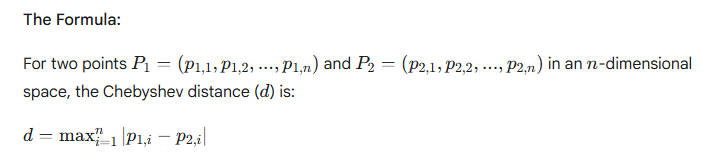


Example: Comparing Smartphone Models

Let's say we want to compare two smartphone models, Phone X and Phone Y, based on three key specifications:

* Screen Size (inches): Larger is generally better
* Camera Megapixels (MP): Higher is generally better
* Battery Life (hours): Longer is generally better

Here's their data:

Phone X:

* Screen Size: 6.2 inches
* Camera Megapixels: 48 MP
* Battery Life: 30 hours
* So, Phone X as a point is (6.2,48,30)

Phone Y:

* Screen Size: 6.7 inches
* Camera Megapixels: 64 MP
* Battery Life: 28 hours
* So, Phone Y as a point is (6.7,64,28)

Now, let's calculate the Chebyshev distance between Phone X and Phone Y:

* Absolute difference in Screen Size: ∣6.7−6.2∣=0.5
* Absolute difference in Camera Megapixels: ∣64−48∣=16
* Absolute difference in Battery Life: ∣28−30∣=∣−2∣=2
* Find the maximum of these absolute differences: max(0.5,16,2)=16

So, the Chebyshev distance between Phone X and Phone Y is 16.

Interpretation:

The Chebyshev distance of 16 tells us that the largest difference between Phone X and Phone Y in any single specification is 16, which corresponds to the Camera Megapixels. This means that from a Chebyshev distance perspective, these two phones are "16 units apart" because their camera megapixels differ by 16, and no other feature has a larger absolute difference.

This distance metric is useful when you care about the single "worst case" difference between two points across any of their features. For instance, if you're building a system where a failure in any single dimension is critical, Chebyshev distance might be a good choice.

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Utility function to calculate the Chebyshev Distance
4. Choose a reference student
5. Calculating the Chebyshev distance from reference student without applying standardization
6. Calculating the Chebyshev distance from reference student after applying standardization

# 1. Import necessary libraries

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Create the dataset

In [59]:
# 1. Create a dataset with 20 students and convert to DataFrame

np.random.seed(42) # for reproducibility

num_students = 20
data = {
    'Hours Studied': np.random.randint(5, 20, num_students),
    'Practice Questions': np.random.randint(30, 150, num_students),
    'Attendance Rate': np.random.randint(60, 100, num_students),
    'Prior Exam Score': np.random.randint(50, 95, num_students)
}

In [60]:
# Convert it into a dataframe and add a index

students_df = pd.DataFrame(data)
students_df.index = [f'Student_{i+1}' for i in range(num_students)]


In [61]:
print("Original Student Learning Pattern Data (DataFrame):")

students_df

Original Student Learning Pattern Data (DataFrame):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,11,51,87,84
Student_2,8,82,75,63
Student_3,17,31,74,66
Student_4,19,117,62,85
Student_5,15,137,96,89
Student_6,12,59,66,53
Student_7,17,67,80,51
Student_8,9,31,68,55
Student_9,11,93,98,91
Student_10,14,89,77,53


# 3. Utility function to calculate the Chebyshev Distance

In [62]:

def chebyshev_distance(point1, point2):
    """
    Calculates the Chebyshev distance (L-infinity distance) between two n-dimensional points.
    Assumes points are pandas Series or numpy arrays.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.max(np.abs(point1 - point2))

# 4. Choose a reference student

In [63]:
# Choose a reference student (e.g., the first student in the DataFrame)

reference_student_name = students_df.index[0]
reference_student_pattern = students_df.loc[reference_student_name]

print(f"Reference Student for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_pattern.to_dict()}")
print("-" * 70)

Reference Student for Comparison: Student_1
Pattern: {'Hours Studied': 11, 'Practice Questions': 51, 'Attendance Rate': 87, 'Prior Exam Score': 84}
----------------------------------------------------------------------


# 5. Calculating the Chebyshev distance from reference student without applying standardization

In [64]:
# 3. Calculate distance measure with one student and others WITHOUT standardization

print("--- Calculating Chebyshev Distances WITHOUT Standardization ---")
distances_no_std = {}
for student_name, pattern in students_df.iterrows():
    if student_name != reference_student_name:
        dist = chebyshev_distance(reference_student_pattern, pattern)
        distances_no_std[student_name] = dist

# Sort and print results
sorted_distances_no_std = sorted(distances_no_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITHOUT standardization):")
for student, dist in sorted_distances_no_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_no_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

--- Calculating Chebyshev Distances WITHOUT Standardization ---

Closest students to Student_1 (WITHOUT standardization):
- Student_15: 2.00
- Student_12: 17.00
- Student_3: 20.00
- Student_11: 24.00
- Student_18: 27.00
...
- Student_4: 66.00
- Student_17: 67.00
- Student_19: 69.00
- Student_5: 86.00
- Student_16: 86.00
----------------------------------------------------------------------


It is identifying which 5 students have the most similar study habits to the reference_student ('Student_1') and which 5 are the least similar, based on the raw, unscaled values of 'Hours Studied', 'Practice Questions', 'Attendance Rate', and 'Prior Exam Score'.

# 6.Calculating the Chebyshev distance from reference student after applying standardization

### A. Standardize the dataframe

In [65]:

# Standardize the entire DataFrame

scaler = StandardScaler()
students_scaled_array = scaler.fit_transform(students_df)
students_scaled_df = pd.DataFrame(students_scaled_array, columns=students_df.columns, index=students_df.index)

print("\nScaled Student Learning Pattern Data (DataFrame ):")

students_scaled_df


Scaled Student Learning Pattern Data (DataFrame ):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,-0.307661,-0.998752,1.042323,0.892015
Student_2,-1.186694,-0.020511,-0.074452,-0.649739
Student_3,1.450404,-1.629875,-0.167516,-0.429489
Student_4,2.036425,1.083954,-1.284291,0.965432
Student_5,0.864382,1.715076,1.879904,1.259099
Student_6,-0.014651,-0.746303,-0.912032,-1.383908
Student_7,1.450404,-0.493854,0.390871,-1.530742
Student_8,-0.893683,-1.629875,-0.725903,-1.237074
Student_9,-0.307661,0.326606,2.066033,1.405933
Student_10,0.571371,0.200382,0.111677,-1.383908


### B. Choose the reference student

In [66]:
# Get the scaled pattern for the reference student

reference_student_scaled_pattern = students_scaled_df.loc[reference_student_name]

print(f"Reference Student (Scaled) for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_scaled_pattern.apply(lambda x: f'{x:.2f}').to_dict()}")
print("-" * 70)

Reference Student (Scaled) for Comparison: Student_1
Pattern: {'Hours Studied': '-0.31', 'Practice Questions': '-1.00', 'Attendance Rate': '1.04', 'Prior Exam Score': '0.89'}
----------------------------------------------------------------------


### C. Calculate the Minkowski Distance and most 5 and least 5 similar students from reference student

In [67]:
distances_std = {}
for student_name, pattern in students_scaled_df.iterrows():
    if student_name != reference_student_name:
        dist = chebyshev_distance(reference_student_scaled_pattern, pattern)
        distances_std[student_name] = dist

# Sort and print results
sorted_distances_std = sorted(distances_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITH standardization):")
for student, dist in sorted_distances_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

print("\n--- Comparison of Results ---")
print("Observe how the absolute Chebyshev distance values change after standardization.")
print("Chebyshev distance is *extremely* sensitive to the feature with the largest difference.")
print("Without standardization, the feature with the widest original range will almost always determine the distance.")
print("With standardization, all features are on an equal footing, ensuring that the maximum difference truly reflects the most significant disparity across the *scaled* features, not just the raw numerical scale.")


Closest students to Student_1 (WITH standardization):
- Student_15: 0.29
- Student_12: 1.25
- Student_9: 1.33
- Student_2: 1.54
- Student_18: 1.54
...
- Student_10: 2.28
- Student_4: 2.34
- Student_7: 2.42
- Student_5: 2.71
- Student_16: 2.71
----------------------------------------------------------------------

--- Comparison of Results ---
Observe how the absolute Chebyshev distance values change after standardization.
Chebyshev distance is *extremely* sensitive to the feature with the largest difference.
Without standardization, the feature with the widest original range will almost always determine the distance.
With standardization, all features are on an equal footing, ensuring that the maximum difference truly reflects the most significant disparity across the *scaled* features, not just the raw numerical scale.


# Interpretation

Chebyshev distance absolutely requires standardization. Chebyshev distance, which is a special case of Minkowski distance where 'p' approaches infinity, measures the maximum absolute difference across any single dimension. This means the entire distance is determined solely by the feature with the largest unscaled difference between two points. If features have vastly different scales, the feature with the widest range will almost always dictate the Chebyshev distance, regardless of how similar the points are on other potentially important, but smaller-scaled, features. Therefore, standardizing the data is crucial to ensure all features contribute fairly to finding the maximum difference.